In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from plot_utils import plotCategoricalPerformance

exp_fam = 'inv_wishart';

flow_string = '30P';
datadir = '/Users/sbittner/Documents/efn/results/scaling_dim/';
if (exp_fam == 'dirichlet'):
    Ds = [5, 15, 25];
elif (exp_fam == 'inv_wishart'):
    Ds = [4, 9, 16, 25];
num_Ds = len(Ds);
M = 100;
nsamps = 10;

NF1_R2s = np.zeros((num_Ds,nsamps));
NF1_KLs = np.zeros((num_Ds,nsamps));

EFN10_fixed_R2s = np.zeros((num_Ds,nsamps));
EFN10_fixed_KLs = np.zeros((num_Ds,nsamps));

EFN10_stochastic_R2s = np.zeros((num_Ds,nsamps));
EFN10_stochastic_KLs = np.zeros((num_Ds,nsamps));



for i in range(num_Ds):
    D = Ds[i];
    for rs in range(1,nsamps+1):
        fname = datadir + 'EFN_%s_fixedEta_D=%d_K=1_M=%d_flow=%s_L=8_rs=%d/results.npz' % (exp_fam, D, M, flow_string, rs);
        try:
            X = np.load(fname);
            NF1_R2s[i,rs-1] = X['train_R2s'][-1,0];
            NF1_KLs[i,rs-1] = X['train_KLs'][-1,0];
        except:
            continue;
    rs = 1;
    try:
        fname = datadir + 'EFN_%s_fixedEta_D=%d_K=10_M=%d_flow=%s_L=8_rs=%d/results.npz' % (exp_fam, D, M, flow_string, rs);
        X = np.load(fname);
        EFN10_fixed_R2s[i,:] = X['train_R2s'][-1,:];
        EFN10_fixed_KLs[i,:] = X['train_KLs'][-1,:];
    except:
        pass;
    
    try:
        fname = datadir + 'EFN_%s_stochaticEta_D=%d_K=10_M=%d_flow=%s_L=8_rs=%d/results.npz' % (exp_fam, D, M, flow_string, rs);
        X = np.load(fname);
        EFN10_stochastic_R2s[i,:] = X['train_R2s'][-1,:];
        EFN10_stochastic_KLs[i,:] = X['train_KLs'][-1,:];
    except:
        pass;
    
    
print('NF1_R2s');
print(NF1_R2s);
print('NF1_KLs');
print(NF1_KLs);

print('EFN10_fixed_R2s');
print(EFN10_fixed_R2s);
print('EFN10_fixed_KLs');
print(EFN10_fixed_KLs);

print('EFN10_stochastic_R2s');
print(EFN10_stochastic_R2s);
print('EFN10_stochastic__KLs');
print(EFN10_stochastic_KLs);



NF1_R2s
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.98277381 0.95692811 0.99174717 0.98026809 0.99247538 0.96856279
  0.98013833 0.98981628 0.99159572 0.9912203 ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]]
NF1_KLs
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.07899986 0.13048483 0.05799565 0.09496293 0.06001163 0.08955284
  0.05269118 0.04056716 0.05200143 0.05390109]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]]
EFN10_fixed_R2s
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.

In [16]:
R2s = np.concatenate((np.expand_dims(NF1_R2s, 0), np.expand_dims(EFN10_fixed_R2s, 0), np.expand_dims(EFN10_stochastic_R2s, 0)), 0);
KLs = np.concatenate((np.expand_dims(NF1_KLs, 0), np.expand_dims(EFN10_fixed_KLs, 0), np.expand_dims(EFN10_stochastic_KLs, 0)), 0);

print(R2s.shape, KLs.shape);

(3, 3, 10) (3, 3, 10)


[5, 15, 25]
(3, 3, 10) (3, 3, 10)


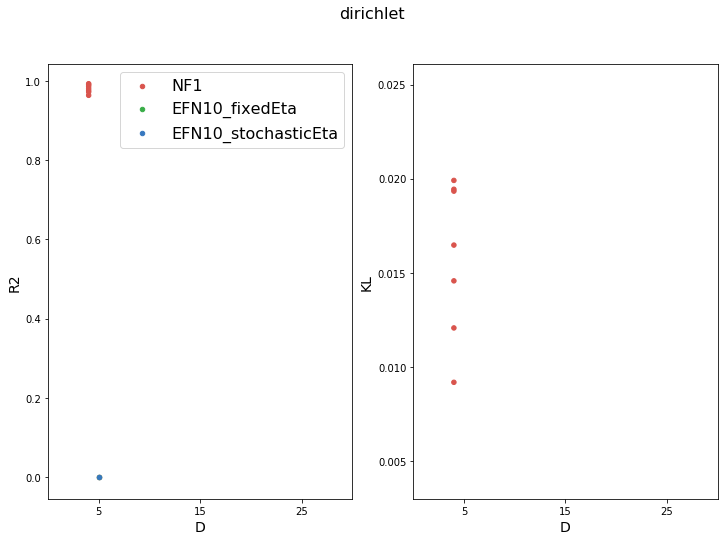

In [17]:
print(Ds);
fontsize = 14;
dotsize = 20;
x = np.array(Ds);
print(R2s.shape, KLs.shape);
legendstrs = ['NF1', 'EFN10_fixedEta', 'EFN10_stochasticEta'];
fig = plt.figure(figsize=(12, 8));
ax = fig.add_subplot(1,2,1);
plotCategoricalPerformance(x, R2s, legendstrs, plottype='scatter', dotsize=dotsize);
ax.set_xticks(x);
ax.set_xticklabels(Ds);
plt.xlabel('D', fontsize=fontsize);
plt.ylabel('R2', fontsize=fontsize);
plt.xlim([0, 30]);
#plt.ylim([0, 1.02]);

ax = fig.add_subplot(1,2,2);
plotCategoricalPerformance(x, KLs, plottype='scatter', dotsize=dotsize);
plt.xlim([0, 30]);
ax.set_xticks(x);
ax.set_xticklabels(Ds);
plt.xlabel('D', fontsize=fontsize);
plt.ylabel('KL', fontsize=fontsize);
#plt.ylim([0, 1]);
plt.suptitle(exp_fam, fontsize=fontsize+2);
plt.show();